**Notebook credit**: based on the F. Chollet's original notebook [here](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter05_fundamentals-of-ml.ipynb).

# Fundamentals of machine learning

## Improving model fit

Many DL projects will go through the following progression (also listed are ideas that help you make progress if you're stuck at a particular stage):

1. Training loss goes down over time.
  (如果失败则 try changing gradient descent parameters)
2. Model meaningfully generalizes: you can beat a common-sense baseline you set.
  (如果失败则 leverage better architecture priors)
3. Your model is able to _overfit_ (low training loss, high validation loss).
  (如果失败则 increase model capacity.)

Now——4. refine generalization by fighting overfitting.

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

An inappropriately large learning rate( of value 1) can cause training to fail even on a simple problem like MNIST.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # use a learning rate of 1.0 which is a bit too big
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 544.6664 - accuracy: 0.2678 - val_loss: 2.2930 - val_accuracy: 0.1828
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 2.5336 - accuracy: 0.1691 - val_loss: 14.9678 - val_accuracy: 0.1541
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 2.7800 - accuracy: 0.1502 - val_loss: 2.4345 - val_accuracy: 0.1053
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 2.5513 - accuracy: 0.1234 - val_loss: 2.3699 - val_accuracy: 0.1820
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.5712 - accuracy: 0.1483 - val_loss: 2.4101 - val_accuracy: 0.1386
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 3.0108 - accuracy: 0.1564 - val_loss: 2.3404 - val_accuracy: 0.1533
Epoch 7/10
375/375 [==============================] - 5s 13ms/step - loss: 2.4447 - accuracy: 0.1759 - val_loss: 2.3353 - val_accuracy: 0.1

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # use a smaller learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3439 - accuracy: 0.9123 - val_loss: 0.1393 - val_accuracy: 0.9611
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1282 - accuracy: 0.9641 - val_loss: 0.1280 - val_accuracy: 0.9672
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0973 - accuracy: 0.9742 - val_loss: 0.1499 - val_accuracy: 0.9682
Epoch 4/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0838 - accuracy: 0.9786 - val_loss: 0.1583 - val_accuracy: 0.9690
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0686 - accuracy: 0.9826 - val_loss: 0.1434 - val_accuracy: 0.9732
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0598 - accuracy: 0.9856 - val_loss: 0.1877 - val_accuracy: 0.9704
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0584 - accuracy: 0.9863 - val_loss: 0.1790 - val_accuracy: 0.9734

If training appears to get stuck, you can try the following:

- Lowering or increasing the learning rate. A learning rate that is too high may lead to updates that vastly overshoot a proper fit, like in the preceding example, and a learning rate that is too low may make training so slow that it appears to stall.
- Increasing the batch size. A batch with more samples will lead to gradients that are more informative and less noisy (lower variance).

### Leveraging better architecture priors

You are able to get training started, but for some reason your validation metrics aren't improving at all. They remain no better than what a random classifier would achieve: your model trains but doesn't generalize. There might be several reasons why this might be happening. Two common ones are:

**Input data simply doesn't contain sufficient information to predict your targets**

- what happened when we tried to fit an MNIST model where the labels were shuffled
- the model would train just fine, but validation accuracy would stay stuck at 10%
- it was plainly impossible to generalize with such a dataset

**The kind of model you're using is not suited for the problem at hand**

- In a timeseries prediction problem, a densely connected architecture may be less appropriate: a _recurrent_ architecture might generalize better
- Using a model that makes the right assumptions about the problem is essential to achieve generalization: you should leverage the right architecture priors
- We willl learn about the best architectures to use for a variety of data modalities—images, text, timeseries, and so on

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6747 - accuracy: 0.8319 - val_loss: 0.3612 - val_accuracy: 0.9036
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3535 - accuracy: 0.9018 - val_loss: 0.3105 - val_accuracy: 0.9146
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3182 - accuracy: 0.9115 - val_loss: 0.2947 - val_accuracy: 0.9168
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3023 - accuracy: 0.9158 - val_loss: 0.2848 - val_accuracy: 0.9202
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2926 - accuracy: 0.9192 - val_loss: 0.2791 - val_accuracy: 0.9237
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2861 - accuracy: 0.9202 - val_loss: 0.2762 - val_accuracy: 0.9250
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2809 - accuracy: 0.9219 - val_loss: 0.2729 - val_accuracy: 0.9252
Epoch 

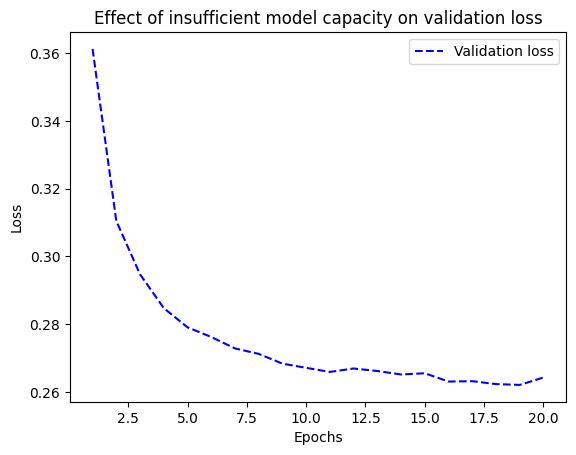

In [ ]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- Validation metrics seem to stall, or to improve very slowly, instead of peaking and reversing course.
- You can fit, but you can’t clearly overfit, even after many iterations over the training data.

**It should always be possible to overfit**

- If you can’t seem to be able to overfit, it’s likely a problem with the representational power of your model
- You’re going to need a bigger model, one with more capacity, that is to say, one able to store more information
- You can increase representational power by
  - adding more layers
  - using bigger layers (layers with more parameters)
  - using kinds of layers that are more appropriate for the problem at hand (better architecture priors).

Let’s try training a bigger model, one with two intermediate layers with 96 units each:

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3663 - accuracy: 0.8959 - val_loss: 0.2022 - val_accuracy: 0.9435
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1646 - accuracy: 0.9507 - val_loss: 0.1675 - val_accuracy: 0.9523
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1165 - accuracy: 0.9657 - val_loss: 0.1272 - val_accuracy: 0.9622
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0897 - accuracy: 0.9735 - val_loss: 0.1161 - val_accuracy: 0.9663
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0724 - accuracy: 0.9778 - val_loss: 0.0978 - val_accuracy: 0.9726
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0603 - accuracy: 0.9811 - val_loss: 0.0903 - val_accuracy: 0.9747
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0995 - val_accuracy: 0.9722
Epoch 

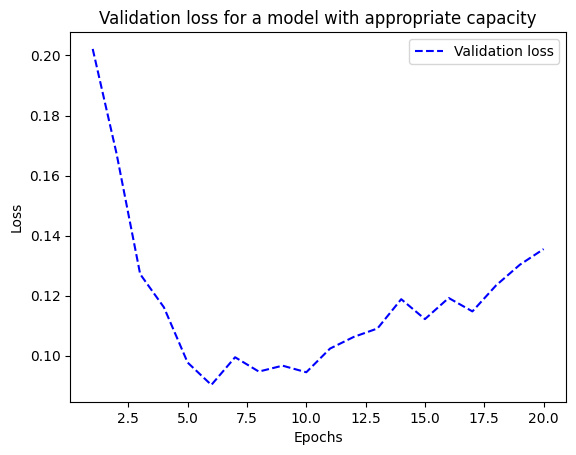

In [ ]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Validation loss for a model with appropriate capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Regularizing your model

Regularization: actively impeding the model’s ability to fit perfectly to the training data, with the goal of making the model perform better during validation.

- regularizing a model is a process that should always be guided by an accurate evaluation procedure
- you will only achieve generalization if you can measure it!

Let’s review some of the most common regularization techniques in the context of IMDB movie reviews problem


#### Reducing the network's size

- a model that is too small will not overfit
- simplest way to mitigate overfitting is to reduce the size of the model
- number of learnable parameters in the model is determined by the number of layers and the number of units per layer
- however, you should use models that have enough parameters that they don’t underfit!
- compromise is to be found between too much capacity and not enough capacity
- no magical formula to determine the right number of layers or the right size for each layer
- evaluate an array of different architectures (on your validation set, not on your test set, of course) in order to find the correct model size for your data
- general workflow for finding an appropriate model size:
  - start with relatively few layers and parameters
  - increase the size of the layers or add new layers until you see diminishing returns with regard to validation loss

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 121ms/step - loss: 0.5265 - accuracy: 0.7787 - val_loss: 0.4285 - val_accuracy: 0.8294
Epoch 2/20
30/30 [==============================] - 2s 55ms/step - loss: 0.3205 - accuracy: 0.8919 - val_loss: 0.3203 - val_accuracy: 0.8778
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2395 - accuracy: 0.9201 - val_loss: 0.2934 - val_accuracy: 0.8821
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1914 - accuracy: 0.9350 - val_loss: 0.2971 - val_accuracy: 0.8779
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1571 - accuracy: 0.9495 - val_loss: 0.2847 - val_accuracy: 0.8848
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1371 - accuracy: 0.9540 - val_loss: 0.2877 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1159 - accuracy: 0.9641 - val_loss: 0.3137 - val_accuracy: 0.8792
Epoch 8/20
3

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 94ms/step - loss: 0.6234 - accuracy: 0.6888 - val_loss: 0.5746 - val_accuracy: 0.7540
Epoch 2/20
30/30 [==============================] - 1s 50ms/step - loss: 0.5377 - accuracy: 0.7983 - val_loss: 0.5346 - val_accuracy: 0.7679
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.4921 - accuracy: 0.8447 - val_loss: 0.5046 - val_accuracy: 0.8318
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.4597 - accuracy: 0.8788 - val_loss: 0.4866 - val_accuracy: 0.8583
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.4343 - accuracy: 0.8977 - val_loss: 0.4784 - val_accuracy: 0.8466
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.4129 - accuracy: 0.9129 - val_loss: 0.4637 - val_accuracy: 0.8761
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3946 - accuracy: 0.9257 - val_loss: 0.4612 - val_accuracy: 0.8632
Epoch 8/20
30

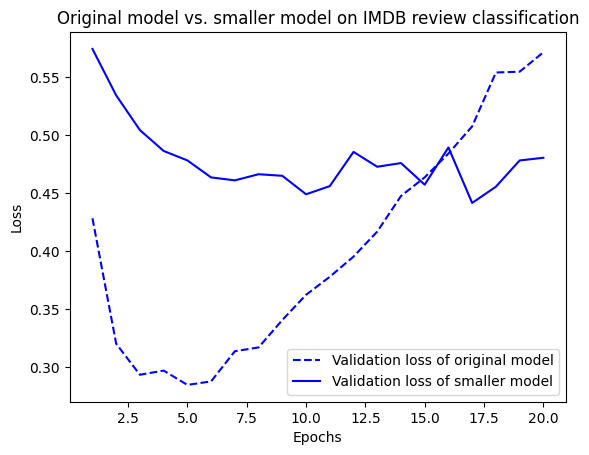

In [ ]:
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_smaller, "b-",
         label="Validation loss of smaller model")
plt.title("Original model vs. smaller model on IMDB review classification")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- the smaller model starts overfitting later than the reference model
- its performance degrades more slowly once it starts overfitting

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 13s 400ms/step - loss: 0.5620 - accuracy: 0.7628 - val_loss: 0.6838 - val_accuracy: 0.6828
Epoch 2/20
30/30 [==============================] - 11s 367ms/step - loss: 0.3395 - accuracy: 0.8619 - val_loss: 0.2808 - val_accuracy: 0.8837
Epoch 3/20
30/30 [==============================] - 11s 360ms/step - loss: 0.2385 - accuracy: 0.9055 - val_loss: 0.3085 - val_accuracy: 0.8684
Epoch 4/20
30/30 [==============================] - 12s 416ms/step - loss: 0.1811 - accuracy: 0.9301 - val_loss: 0.2896 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 12s 417ms/step - loss: 0.1378 - accuracy: 0.9461 - val_loss: 0.8162 - val_accuracy: 0.7373
Epoch 6/20
30/30 [==============================] - 9s 308ms/step - loss: 0.1225 - accuracy: 0.9563 - val_loss: 0.3035 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 9s 311ms/step - loss: 0.0876 - accuracy: 0.9731 - val_loss: 0.3246 - val_accuracy: 0.8828
E

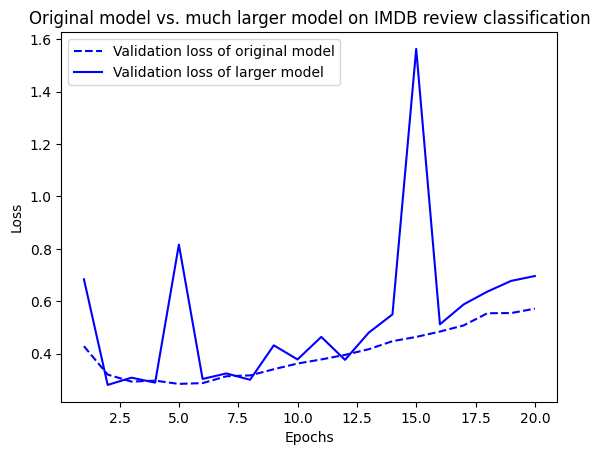

In [ ]:
val_loss_larger = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_larger, "b-",
         label="Validation loss of larger model")
plt.title("Original model vs. much larger model on IMDB review classification")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- bigger model starts overfitting almost immediately
- it overfits much more severely
- its validation loss is also noisier
- it gets training loss near zero very quickly
- a very high capacity model will
  - fit the the training data quickly (resulting in a low training loss)
  - but will be more susceptible it is to overfitting (resulting in a large difference between the training and validation loss)

#### Adding weight regularization

**Adding L2 weight regularization to the model**

Regularization can be applied to:
- weights using `kernel_regularizer`
- biases using `bias_regularizer`
- output of the layer using `activity_regularizer`

We will use weight regularization below.

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    # every coefficient in the weight matrix of the layer will add
    # 0.002 * weight_coefficient_value ** 2
    # to the total loss of the model
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.6074 - accuracy: 0.7728 - val_loss: 0.4655 - val_accuracy: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 47ms/step - loss: 0.4009 - accuracy: 0.8926 - val_loss: 0.3891 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3311 - accuracy: 0.9142 - val_loss: 0.3656 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2942 - accuracy: 0.9265 - val_loss: 0.3669 - val_accuracy: 0.8792
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2740 - accuracy: 0.9309 - val_loss: 0.3630 - val_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2592 - accuracy: 0.9363 - val_loss: 0.3628 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2473 - accuracy: 0.9443 - val_loss: 0.3678 - val_accuracy: 0.8826
Epoch 8/20
30

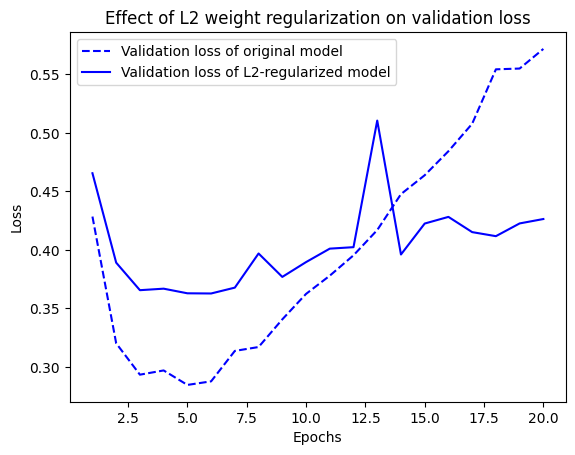

In [ ]:
val_loss_l2_reg = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_l2_reg, "b-",
         label="Validation loss of L2-regularized model")
plt.title("Effect of L2 weight regularization on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- model with L2 regularization has become much more resistant to overfitting than the reference model
- both models have the same number of parameters

**Total loss when using weight regularization includes prediction losses as well as layer losses**

- "loss" as a metric changes meaning when you have weight regularization
- without regularization, loss is simply the average of the prediction loss function over the dataset
- with weight regularization, loss includes *both* prediction losses as well as regularization losses for regularized layers

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

- weight regularization is more typically used for smaller deep learning models
- large deep learning models tend to be so overparameterized that imposing constraints on weight values hasn’t much impact on model capacity and generalization
- in these cases, a different regularization technique is preferred: **dropout**

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.6242 - accuracy: 0.6450 - val_loss: 0.5027 - val_accuracy: 0.8276
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5097 - accuracy: 0.7652 - val_loss: 0.4054 - val_accuracy: 0.8730
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4326 - accuracy: 0.8229 - val_loss: 0.3558 - val_accuracy: 0.8758
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3838 - accuracy: 0.8543 - val_loss: 0.3090 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3360 - accuracy: 0.8772 - val_loss: 0.3000 - val_accuracy: 0.8819
Epoch 6/20
30/30 [==============================] - 2s 63ms/step - loss: 0.2942 - accuracy: 0.8993 - val_loss: 0.2826 - val_accuracy: 0.8908
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2681 - accuracy: 0.9115 - val_loss: 0.2770 - val_accuracy: 0.8902
Epoch 8/20
30

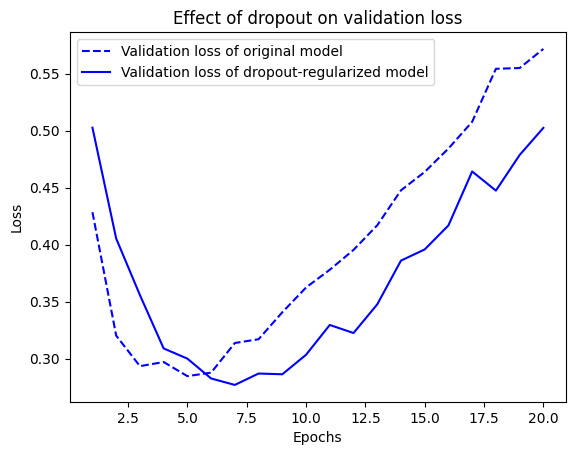

In [ ]:
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.plot(epochs, val_loss_dropout, "b-",
         label="Validation loss of dropout-regularized model")
plt.title("Effect of dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

- dropout achieves clear improvement over the reference model
- it also seems to be working much better than L2 regularization (lowest validation loss reached has improved)

**How does dropout work?**

- dropout, **applied to a layer**, consists of randomly dropping out (setting to zero) a number of output features of the layer **during training**
- after applying dropout, the layer output will have a few zero entries distributed at random
- the dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5.

In [ ]:
batch_size = 4
feature_dim = 5
layer_output = tf.random.uniform((batch_size, feature_dim)) # in reality, layer_output will not be random
layer_output.numpy()

array([[0.02471972, 0.04226112, 0.6676756 , 0.28473115, 0.10217285],
       [0.43423676, 0.8592428 , 0.5135548 , 0.03304565, 0.91238153],
       [0.41194844, 0.9791504 , 0.8356286 , 0.2270031 , 0.373057  ],
       [0.95226467, 0.92783797, 0.4603274 , 0.34082532, 0.12339067]],
      dtype=float32)

In [ ]:
dropout = 0.2 # dropout probability
mask = tf.random.uniform(shape=layer_output.shape) < 1 - dropout # random boolean array where True occurs with prob 1-dropout
mask = tf.cast(mask, tf.float32) # convert True/False to 1/0
mask.numpy()

array([[1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [1., 1., 0., 0., 1.]], dtype=float32)

In [ ]:
layer_output_dropout = layer_output * mask
layer_output_dropout.numpy() # roughly half of the entries will have been zeroed out

array([[0.02471972, 0.04226112, 0.6676756 , 0.        , 0.10217285],
       [0.43423676, 0.8592428 , 0.5135548 , 0.03304565, 0.91238153],
       [0.        , 0.9791504 , 0.8356286 , 0.2270031 , 0.373057  ],
       [0.95226467, 0.92783797, 0.        , 0.        , 0.12339067]],
      dtype=float32)

In [ ]:
layer_output_dropout /= 1 - dropout # keep the random layer output unbiased!

**Simulation to check for unbiased property**

Suppose we have a weight $w$ and we zero it out with probability $p$ as follows:

$$
w_D = w \cdot 1[U < 1-p]
$$

where random variable $U$ distributed as Uniform$(0,1)$. Can you verify the following unbiasedness property?

$$
E\left[ \frac{w_D}{1-p} \right] = w
$$

Note that $w_D$ is either $w$ (with prob $1-p$) or $0$ (with prob $p$) and therefore

$$
E\left[ w_D \right] = w \cdot (1-p) + 0 \cdot p = w(1-p)
$$

In [ ]:
num_iters = 1000
sum = tf.zeros_like(layer_output)
for i in range(num_iters):
  mask = tf.random.uniform(shape=layer_output.shape) < 1 - dropout
  mask = tf.cast(mask, tf.float32)
  layer_output_dropout = layer_output * mask
  layer_output_dropout /= 1 - dropout
  sum += layer_output_dropout
average = sum/num_iters
print("original layer output:\n", layer_output.numpy())  # original layer output
print(f"average over {num_iters} applications of dropout:\n", average.numpy()) # the average of zeroed out layer outputs will be close to the original output

original layer output:
 [[0.02471972 0.04226112 0.6676756  0.28473115 0.10217285]
 [0.43423676 0.8592428  0.5135548  0.03304565 0.91238153]
 [0.41194844 0.9791504  0.8356286  0.2270031  0.373057  ]
 [0.95226467 0.92783797 0.4603274  0.34082532 0.12339067]]
average over 1000 applications of dropout:
 [[0.02453422 0.0430532  0.6618336  0.2808156  0.10357773]
 [0.4369482  0.87212807 0.51290935 0.0336241  0.8952818 ]
 [0.41709492 1.0024052  0.82623154 0.2244484  0.37398744]
 [0.94273597 0.92435354 0.45227146 0.3412485  0.12508653]]


**The paper that introduced dropout**

If you're interested in learning more about dropout including the motivation behind it and connections to deterministic forms of regularization, see the paper:

Srivastava, N., Hinton, G., Krizhevsky, A., Sutskever, I., & Salakhutdinov, R. (2014).  
Dropout: a simple way to prevent neural networks from overfitting.  
The Journal of Machine Learning Research, 15(1), 1929-1958.  
https://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf